In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading The Price Data
data = pd.read_csv('data/AMZN.csv', parse_dates = True, index_col = 'Date')

In [3]:
# Filtering The Columns
data = data.drop(columns = ['Adj Close'])
data

,Open,High,Low,Close,Volume
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200
...,...,...,...,...,...
2020-04-23,2399.979980,2424.219971,2382.080078,2399.449951,5066600
2020-04-24,2417.000000,2420.429932,2382.000000,2410.219971,3831800
2020-04-27,2443.199951,2444.879883,2363.000000,2376.000000,5645600


In [4]:
# Checking For NAN OR Missing Values
data.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5777 entries, 1997-05-15 to 2020-04-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5777 non-null   float64
 1   High    5777 non-null   float64
 2   Low     5777 non-null   float64
 3   Close   5777 non-null   float64
 4   Volume  5777 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 270.8 KB


### Visualizing The Open & Close

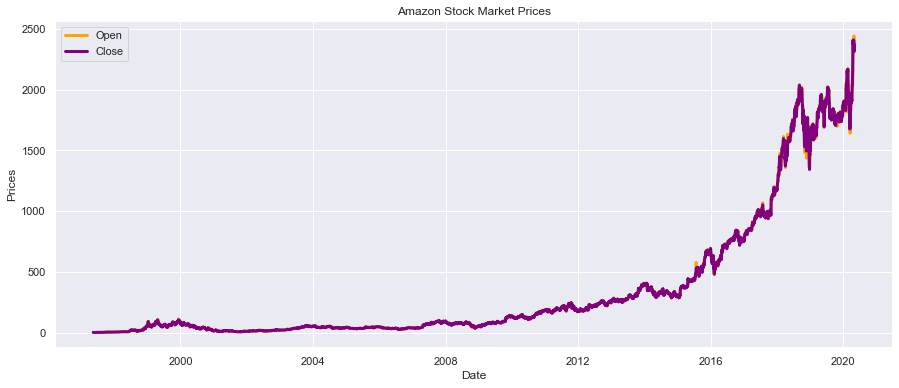

In [6]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15, 6))

plt.title('Amazon Stock Market Prices')
plt.ylabel('Prices')
plt.xlabel('Date')

plt.plot(data['Open'], linewidth=3, color = 'orange')
plt.plot(data['Close'], linewidth=3, color = 'purple')

plt.legend(['Open', 'Close'], loc = 'upper left')
plt.savefig('open_close_prices.png', dpi = 100)
plt.show()

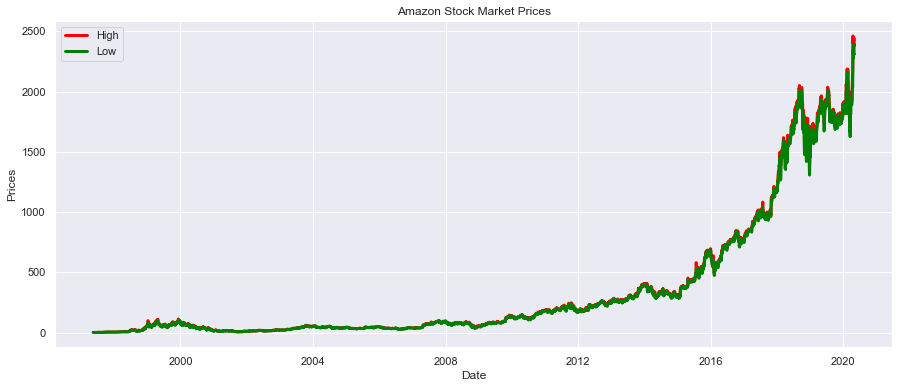

In [7]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(15, 6))

plt.title('Amazon Stock Market Prices')
plt.ylabel('Prices')
plt.xlabel('Date')

plt.plot(data['High'], linewidth=3, color = 'red')
plt.plot(data['Low'], linewidth=3, color = 'green')

plt.legend(['High', 'Low'], loc = 'upper left')
plt.savefig('high_low_prices.png', dpi = 100)
plt.show()

In [8]:
# Get 80% Of Training Data Length
training_data_length = np.ceil(data.shape[0] * 0.8).astype('int')
training_data_length

4622

In [9]:
# Grabing The Training Data
training_data = data[:training_data_length]
training_data

,Open,High,Low,Close,Volume
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200
...,...,...,...,...,...
2015-09-21,544.330017,549.780029,539.590027,548.390015,3283300
2015-09-22,539.710022,543.549988,532.659973,538.400024,3841700
2015-09-23,538.299988,541.210022,534.000000,536.070007,2237600


In [10]:
# Normalizing The Training Data
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_training_data = scaler.fit_transform(training_data)
scaled_training_data

array([[1.78545539e-03, 1.81668601e-03, 1.14175861e-03, 1.02834732e-03,
        6.90171607e-01],
       [9.73884757e-04, 9.17336792e-04, 7.35369731e-04, 6.09392222e-04,
        1.36869475e-01],
       [6.13187276e-04, 5.57595722e-04, 5.80555539e-04, 5.71304066e-04,
        5.41168313e-02],
       ...,
       [9.29551337e-01, 9.32035083e-01, 9.89614972e-01, 9.77476894e-01,
        1.68563780e-02],
       [9.16133370e-01, 9.20552143e-01, 9.68937897e-01, 9.73235520e-01,
        2.90229387e-02],
       [9.36944238e-01, 9.34780559e-01, 9.66207018e-01, 9.55867876e-01,
        3.41268466e-02]])

In [121]:
# Split The Training Set Into X_train, y_train
def split_dataset(dataset):
    X = []
    y = []

    for i in range(60, dataset.shape[0] - 60):
        X.append(dataset[i-60:i, 0])
        y.append(dataset[i:i+2, 0])
    return np.array(X), np.array(y)

In [122]:
X_train, y_train = split_dataset(scaled_training_data)

In [123]:
# Reshaping
# y_train = y_train.reshape(y_train.shape[0], 60, 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

X_train.shape, y_train.shape
# y_train

((4502, 60, 1), (4502, 2))

## Building The LSTM Model

In [124]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [125]:
# Initializing The RNN
model = Sequential()

# Adding The First LSTM Layer & Dropout
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding The Second LSTM Layer & Dropout
# model.add(LSTM(units = 60, return_sequences = True))
# model.add(Dropout(0.2))

# Adding The Last LSTM Layer & Dropout
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding The Final Dense Layer & Dropout
model.add(Dense(units = 2))

In [126]:
# Compling The Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [127]:
# Train The Model
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2)

Train on 3601 samples, validate on 901 samples
Epoch 1/10
3601/3601 [==============================] - 17s 5ms/sample - loss: 0.0016 - val_loss: 0.0015
Epoch 2/10
3601/3601 [==============================] - 12s 3ms/sample - loss: 3.6499e-04 - val_loss: 5.6352e-04
Epoch 3/10
3601/3601 [==============================] - 12s 3ms/sample - loss: 2.9075e-04 - val_loss: 5.8151e-04
Epoch 4/10
3601/3601 [==============================] - 12s 3ms/sample - loss: 2.5263e-04 - val_loss: 6.2745e-04
Epoch 5/10
3601/3601 [==============================] - 12s 3ms/sample - loss: 2.3636e-04 - val_loss: 4.5820e-04
Epoch 6/10
3601/3601 [==============================] - 13s 3ms/sample - loss: 2.0908e-04 - val_loss: 4.4369e-04
Epoch 7/10
3601/3601 [==============================] - 12s 3ms/sample - loss: 1.9659e-04 - val_loss: 4.0459e-04
Epoch 8/10
3601/3601 [==============================] - 12s 3ms/sample - loss: 1.7471e-04 - val_loss: 7.7940e-04
Epoch 9/10
3601/3601 [==============================] - 1

In [128]:
# Saving The Model
model.save('amazon_stock_predictor.model')

## Test Data Preprocessing

In [129]:
data

,Open,High,Low,Close,Volume
Date,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,18853200
...,...,...,...,...,...
2020-04-23,2399.979980,2424.219971,2382.080078,2399.449951,5066600
2020-04-24,2417.000000,2420.429932,2382.000000,2410.219971,3831800
2020-04-27,2443.199951,2444.879883,2363.000000,2376.000000,5645600


In [130]:
# Get 20% Of Test Data
test_data = data[training_data_length-60:]
test_data

,Open,High,Low,Close,Volume
Date,,,,,
2015-07-02,437.000000,438.200012,433.480011,437.709991,1343400
2015-07-06,435.230011,439.730011,433.519989,436.040009,1903200
2015-07-07,435.679993,437.730011,425.570007,436.720001,3454200
2015-07-08,434.350006,435.989990,428.829987,429.700012,2383100
2015-07-09,434.899994,438.720001,434.149994,434.390015,2271400
...,...,...,...,...,...
2020-04-23,2399.979980,2424.219971,2382.080078,2399.449951,5066600
2020-04-24,2417.000000,2420.429932,2382.000000,2410.219971,3831800
2020-04-27,2443.199951,2444.879883,2363.000000,2376.000000,5645600


In [131]:
# Scalling The Test Data
scaled_test_data = scaler.transform(test_data)
scaled_test_data.shape

(1215, 5)

In [132]:
# Split Test Data Into X_test, y_test
X_test, y_test = split_dataset(scaled_test_data)

In [133]:
# Reshaping
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test.shape, y_test.shape

((1095, 60, 1), (1095, 2))

## Evaluate & Predictions

In [134]:
# Load The Model
model = keras.models.load_model('amazon_stock_predictor.model')

In [135]:
# Evaluate The Model
loss = model.evaluate(X_test, y_test)
loss

1095/1095 [==============================] - 2s 2ms/sample - loss: 0.3845


0.3844560386519454

In [136]:
# Make Predictions
predictions = model.predict(X_test)
predictions

array([[0.8817993 , 0.88190615],
       [0.8810312 , 0.881063  ],
       [0.87649816, 0.87640053],
       ...,
       [2.2162354 , 2.2318966 ],
       [2.2148032 , 2.2304099 ],
       [2.2294059 , 2.2444336 ]], dtype=float32)

In [137]:
# Find The Error
error = mean_squared_error(predictions, y_test)
error

0.3844560392948654

In [138]:
# Unscalling
predictions = predictions * 1/scaler.scale_[0]
y_test = y_test * 1/scaler.scale_[0]

predictions.shape, y_test.shape

((1095, 2), (1095, 2))

In [139]:
# Create New DataFrame Predictions VS Test Data
new_df = pd.DataFrame({"Actual": y_test.flatten(), "Prediction": predictions.flatten()})
new_df

,Actual,Prediction
0,518.613770,509.312927
1,504.593750,509.374664
2,504.593750,508.869293
3,504.033752,508.887665
4,504.033752,506.251099
...,...,...
2185,2050.063721,1289.107178
2186,2050.063721,1279.234375
2187,2009.193726,1288.248535
2188,2009.193726,1287.668579


## Visualizing

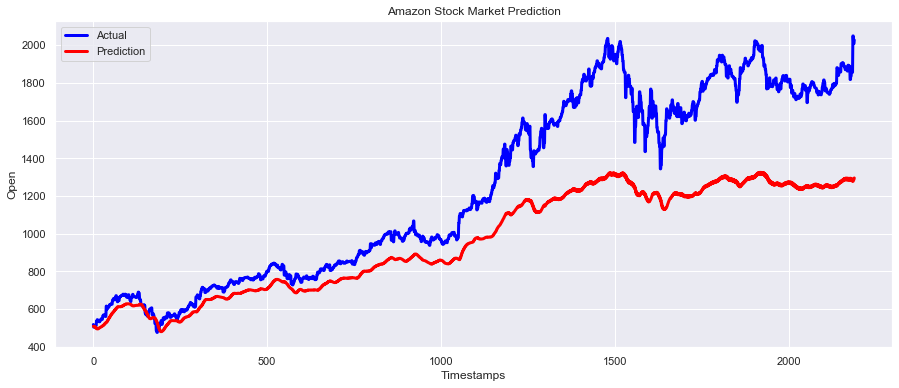

In [141]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (15, 6))

plt.title('Amazon Stock Market Prediction')
plt.ylabel('Open')
plt.xlabel('Timestamps')

plt.plot(new_df['Actual'], color = 'blue', linewidth = 3)
plt.plot(new_df['Prediction'], color = 'red', linewidth = 3)

plt.legend(['Actual', 'Prediction'], loc = 'upper left')
plt.savefig('prediction.png', dpi = 100)
plt.show()